In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/Aditya/Desktop/Work/Occupancy_Estimation.csv")
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
df.shape

(10129, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].view('int64').astype('float64')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Time'] = df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second).astype('float64')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  float64
 1   Time                  10129 non-null  float64
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [21]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

<AxesSubplot:>

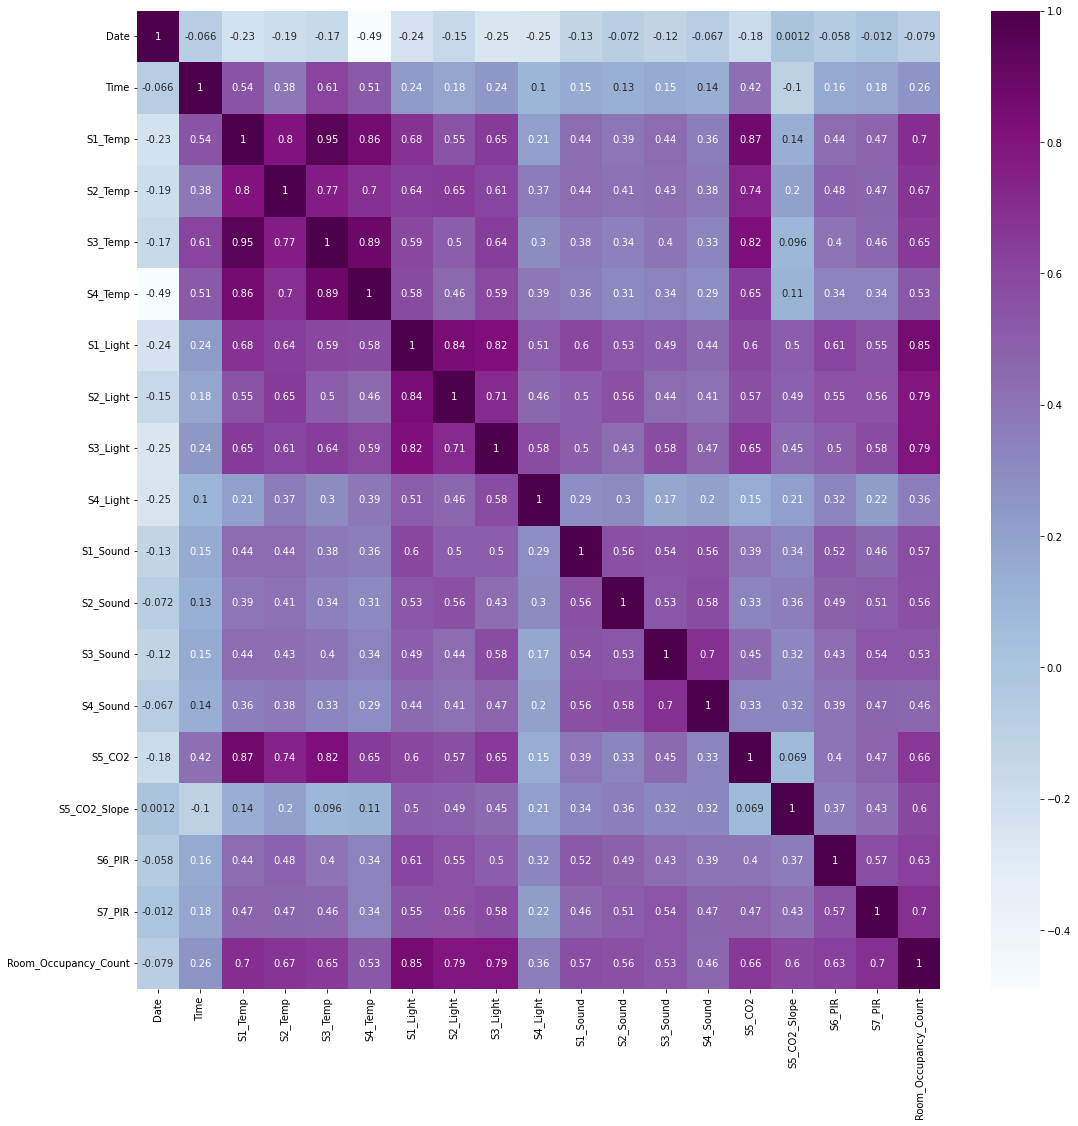

In [22]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap="BuPu")

<Figure size 1296x1296 with 0 Axes>

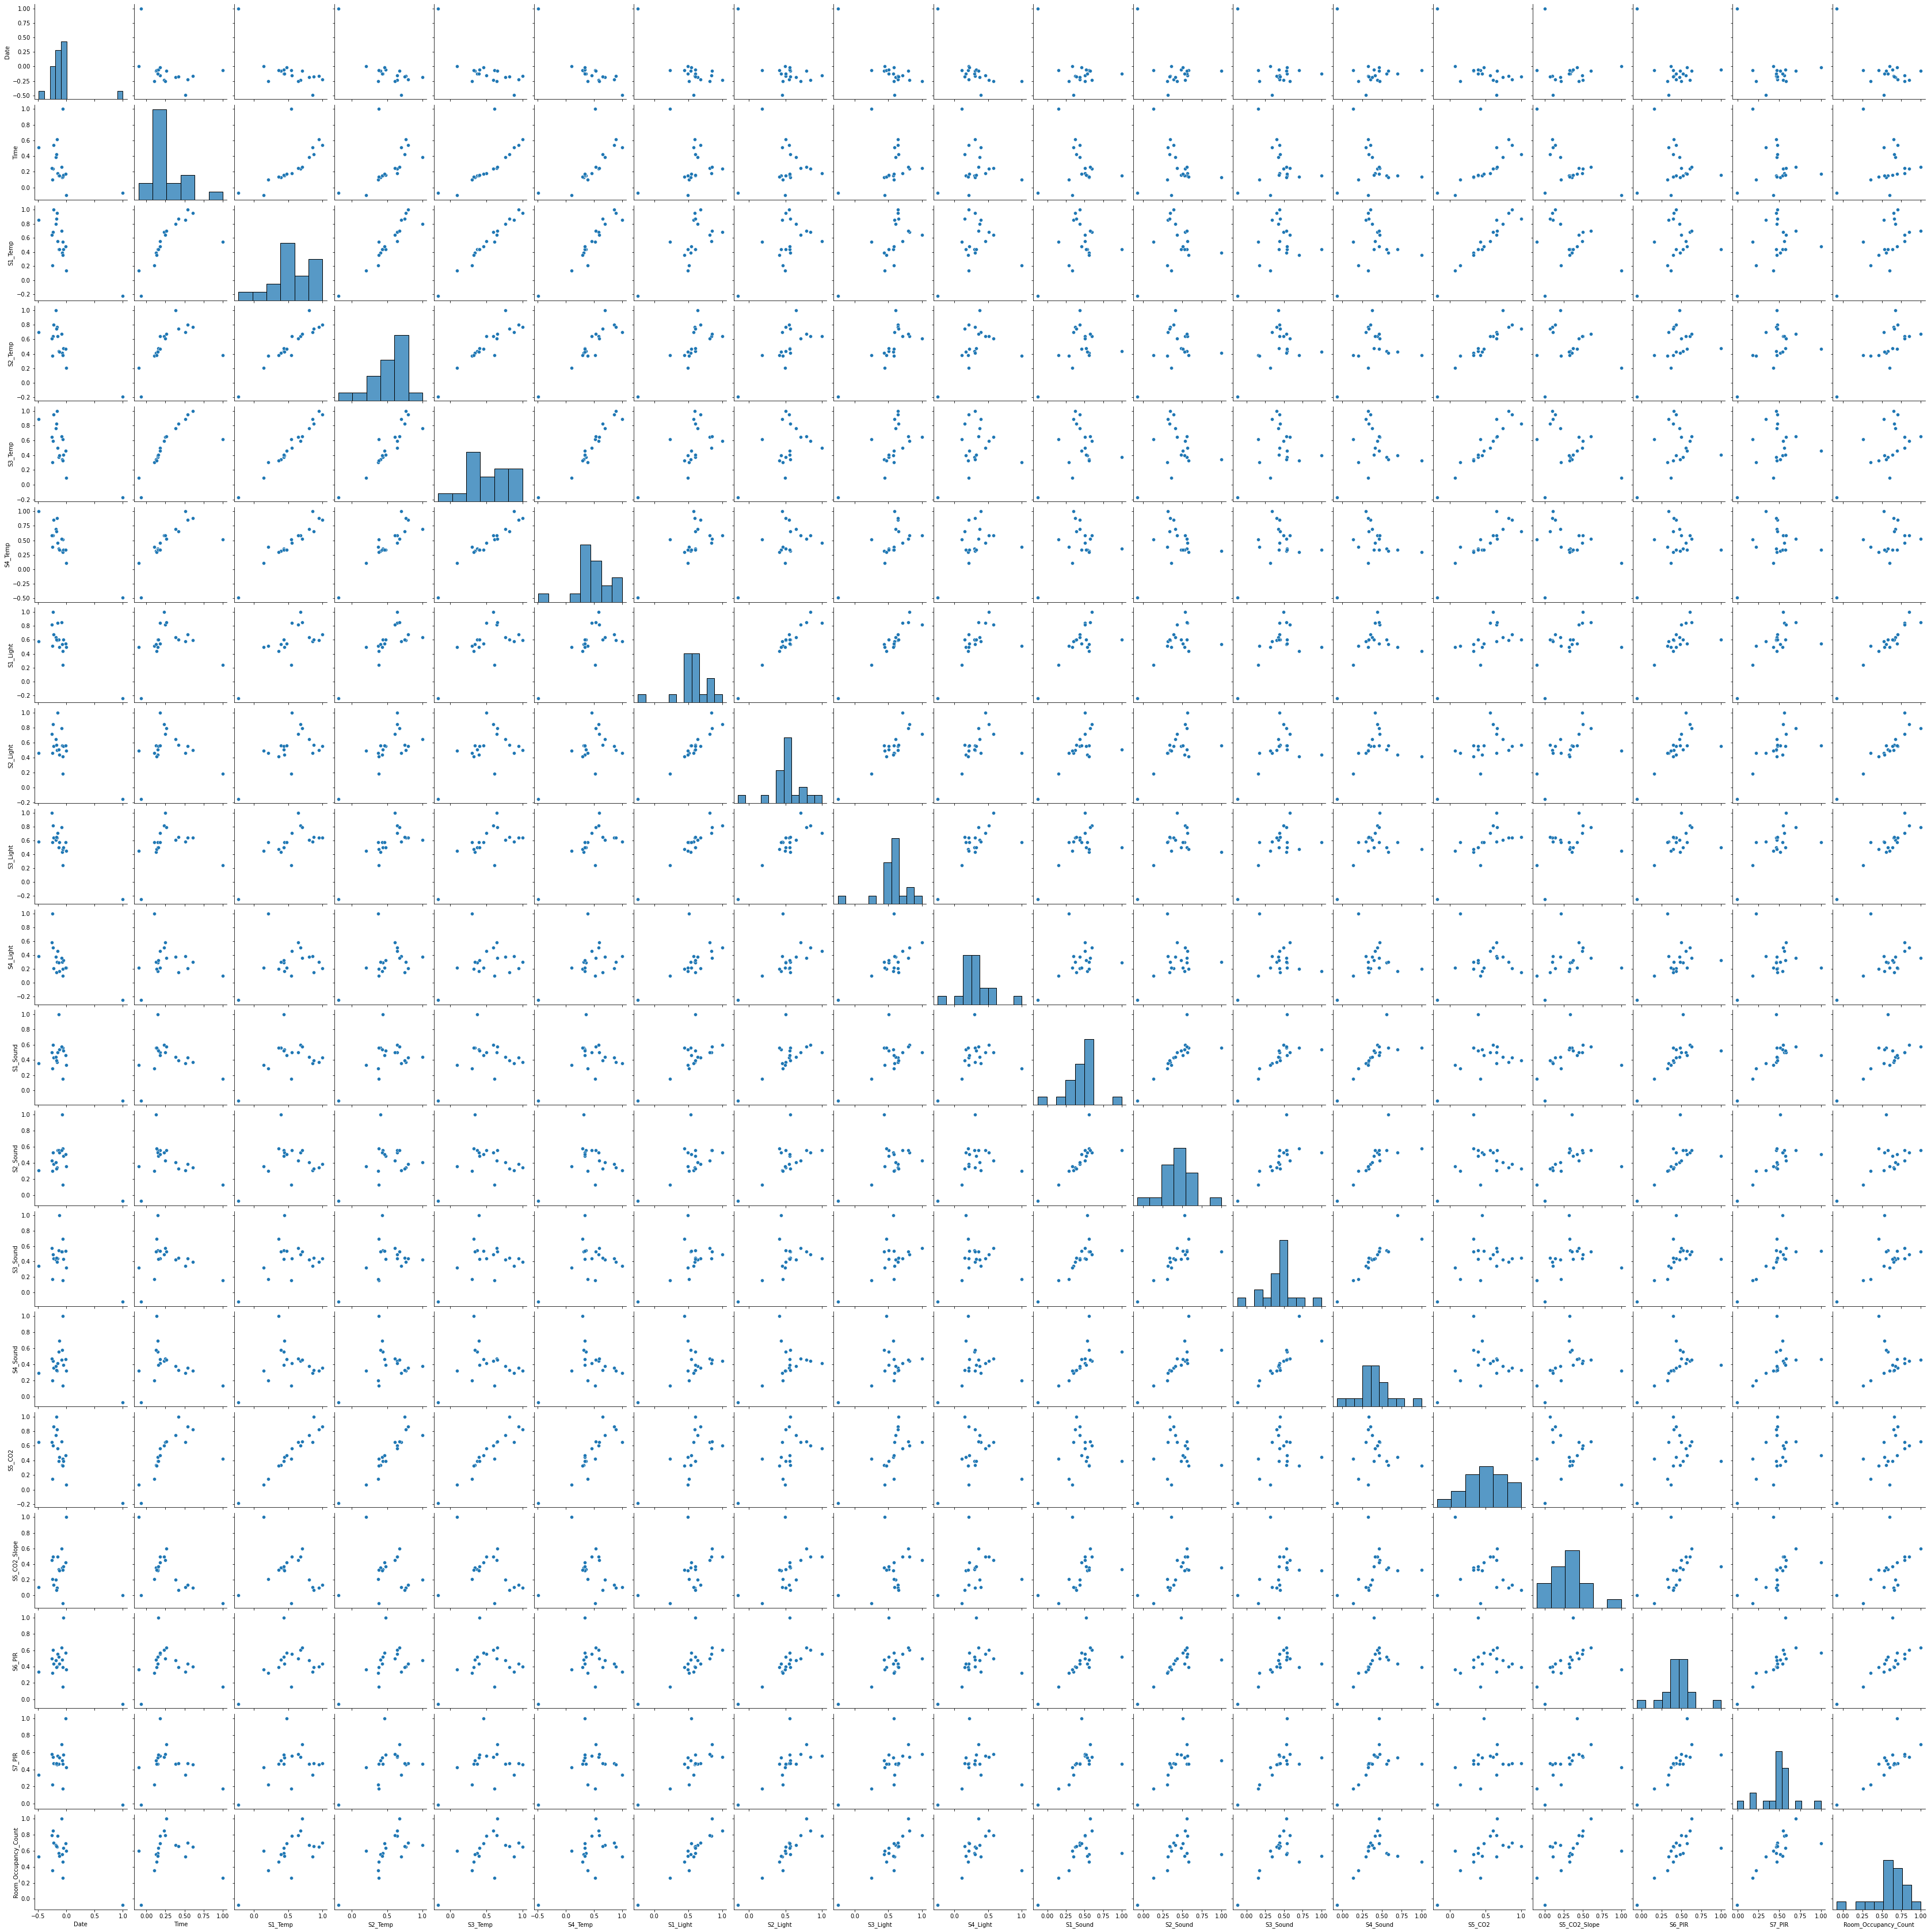

In [23]:
plt.figure(figsize=(18, 18))
sns.pairplot(df.corr())

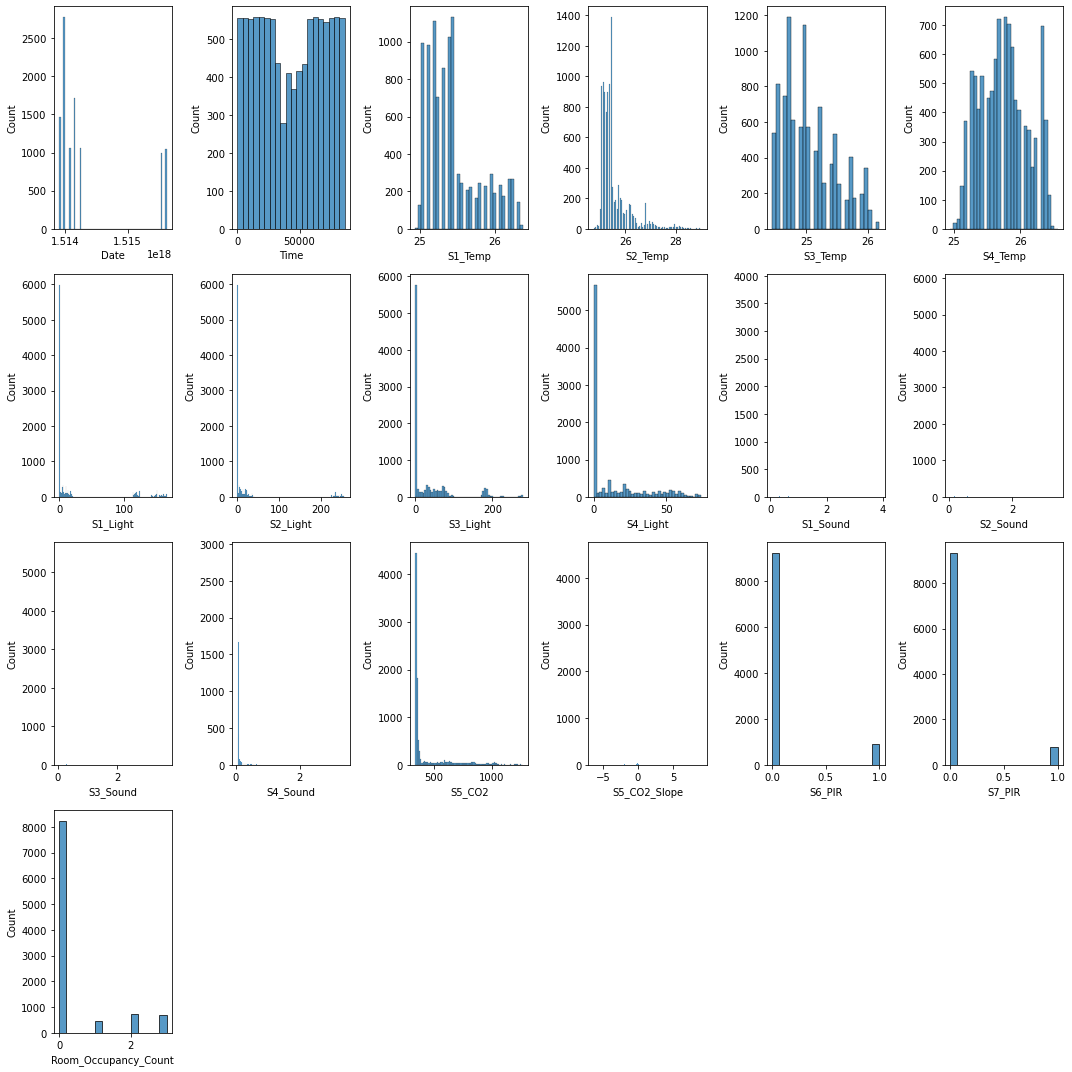

In [24]:
count=1
plt.subplots(figsize=(15, 15))
for i in df.columns:
    plt.subplot(4,6,count) 
    sns.histplot(df[i])
    count+=1
plt.tight_layout()
plt.show()

In [5]:
x = df.drop(['Room_Occupancy_Count'],axis=1).values
y = df[['Room_Occupancy_Count']].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0) 

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7090, 18)
(7090, 1)
(3039, 18)
(3039, 1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

ACCURACY SCORES
LR :- 81.34254689042449 %
SVC :- 81.34254689042449 %
KNN :- 81.34254689042449 %
GNB :- 81.34254689042449 %
DT :- 99.63803882856203 %
dict_keys(['LR', 'SVC', 'KNN', 'GNB', 'DT'])
dict_values([81.34254689042449, 81.34254689042449, 81.34254689042449, 81.34254689042449, 99.63803882856203])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

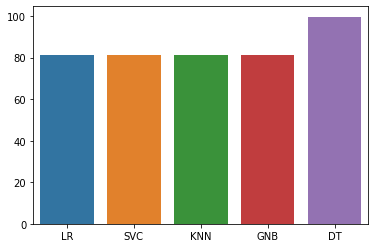

In [10]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf1 = LogisticRegression()
clf2 = SVC()
clf3 = KNeighborsClassifier()
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier()

clf = [clf1, clf2, clf3, clf4, clf5]
clf_name = ['LR', 'SVC', 'KNN', 'GNB', 'DT']
acc = {}

for model, model_name in zip(clf, clf_name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc[model_name] = accuracy_score(y_test, pred) * 100

print("ACCURACY SCORES")
for i, j in acc.items():
    print(i, ':-', j, '%')
    
print(acc.keys())
print(acc.values())

plt.figure()
sns.barplot(x=list(acc.keys()), y=list(acc.values()))

In [11]:
base_pred = clf5.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix , classification_report, plot_confusion_matrix
confusion_matrix(y_test,base_pred)

array([[2472,    0,    0,    0],
       [   0,  128,    3,    0],
       [   0,    0,  235,    4],
       [   2,    0,    2,  193]], dtype=int64)

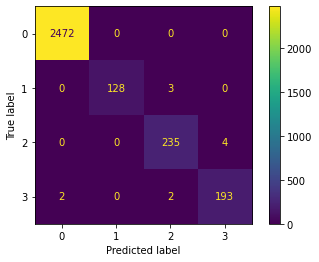

In [13]:
plot_confusion_matrix(clf5,x_test,y_test)

In [14]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2472
           1       1.00      0.98      0.99       131
           2       0.98      0.98      0.98       239
           3       0.98      0.98      0.98       197

    accuracy                           1.00      3039
   macro avg       0.99      0.99      0.99      3039
weighted avg       1.00      1.00      1.00      3039



<AxesSubplot:>

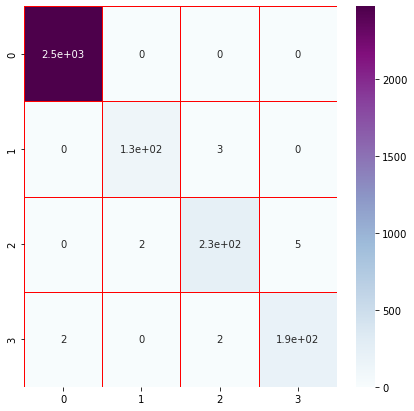

In [33]:
plt.figure(figsize = (7,7))
sns.heatmap(confusion_matrix(y_test,base_pred), annot = True, cbar = True, cmap = "BuPu", linewidths='1', linecolor = 'red')